<a href="https://colab.research.google.com/github/ekomey/SVR-Regression/blob/Training/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
import tensorflow.compat.v1 as tf
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt
%tensorflow_version 2.x
# print our metrics of model adequacy

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
import numpy as np

uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Metro_Interstate_Traffic_Volume.csv']))

Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume (5).csv


DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


(48204, 9)
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Accuracy: [ 590307.9 1296603.6 1579257.4 ... 3544503.  1438356.4 1273930. ]
Prediction: [[3256.315]
 [3256.315]
 [3256.315]
 ...
 [3256.315]
 [3256.315]
 [3256.315]]


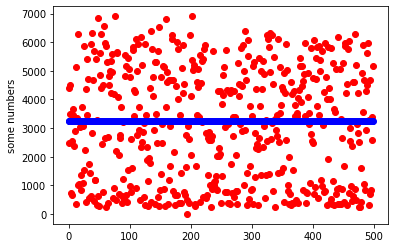

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

dataset = df2.copy()
dataset.tail()

df = df2.dropna()
print(df.shape)

xvars = ["temp", "rain_1h", "snow_1h", "clouds_all"]  # taking the variables that we want to keep as our predictor variables, and putting them into a NumPy Array

X = df.loc[:, xvars].values   # get X values (i.e. predictors/features) # casting our predictors into a NumPy array
y = df.loc[:, "traffic_volume"].values  # get y values (i.e., outcome/target variable)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

# model = Sequential()
# model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
# model.add(Dense(2670, activation='relu'))
# model.add(Dense(1, activation='linear'))
#.summary()

# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
# predictions = model.predict(xval_scale)

# print(history.history.keys())
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

#Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 4
n_output = 1
#Learning parameters
learning_constant = 0.2
number_epochs = 1000
batch_size = 1000

#Defining the input and the output
tf.disable_v2_behavior()
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases output layer
b3 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

def multilayer_perceptron(input_d):
 #Task of neurons of first hidden layer
 layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
 #Task of neurons of second hidden layer
 layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
 #Task of neurons of output layer
 out_layer = tf.add(tf.matmul(layer_2, w3),b3)

 return out_layer

 #Create model
neural_network = multilayer_perceptron(X)

#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

#Initializing the variables
init = tf.global_variables_initializer()

# X1 = np.savetxt('x1.txt', X1)
# X2 = np.savetxt('x2.txt', X2)
# y1 = np.savetxt('y1.txt', y1)
# y2 = np.savetxt('y2.txt', y2)

#a_file = open("x1.txt")
#lines = a_file.readlines()
#for line in lines:
#    print(line)
#a_file.close()

batch_x1= X_train
batch_x2= X_val

batch_y1= y_train
batch_y2= y_val

label=batch_y2 #+1e-50-1e-50
# batch_x=np.column_stack((np.transpose(batch_x1), np.transpose(batch_x2)))
# batch_y=np.column_stack((batch_y1, batch_y2))

batch_x_train= batch_x1
batch_y_train= batch_y1

batch_x_test= batch_x2
batch_y_test= batch_y2

label_train= batch_y_train
label_test= batch_y_test

with tf.Session() as sess:
  sess.run(init)
  #Training epoch
  for epoch in range(number_epochs):

    sess.run(optimizer, feed_dict={X: batch_x_train, Y: batch_y_train})
    #Display the epoch
    if epoch % 100 == 0:
      print("Epoch:", '%d' % (epoch))
  # Test model
  pred = (neural_network) # Apply softmax to logits
  accuracy=tf.keras.losses.MSE(pred,Y)
  print("Accuracy:", accuracy.eval({X: batch_x_train, Y: batch_y_train}))
  #tf.keras.evaluate(pred,batch_x)
  print("Prediction:", pred.eval({X: batch_x_train}))
  output=neural_network.eval({X: batch_x_train})
  plt.plot(batch_y_train[0:500], 'ro', output[0:500], 'bo')
  plt.ylabel('some numbers')
  plt.show()

  estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
  correct_prediction1 = tf.equal(tf.argmax(pred, 1),label)
  accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
  #print(accuracy1.eval({X: batch_x}))

